In [488]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

In [427]:
df=pd.read_excel("C:/Users/prapthi.pandian/Documents/GL-Python Data/Mod 11- FRA/Proj/Part A/CompData-1.xlsx")

In [428]:
df.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8820000000.00,0.00,0.46,0.00,0.00,0.32,0.19,0.02,...,0.31,0.03,0,0.03,0.62,0.03,0.57,1,0.02,0
1,21214,Tata Tele. Mah.,9380000000.00,4230000000.00,0.46,0.00,0.00,0.32,0.16,0.02,...,0.31,0.04,0,0.01,0.62,0.03,0.56,1,0.03,1
2,14852,ABG Shipyard,3800000000.00,815000000.00,0.45,0.00,0.00,0.30,0.17,0.02,...,0.31,0.03,0,0.00,0.62,0.03,0.57,1,0.04,0
3,2439,GTL,6440000000.00,0.00,0.46,0.00,0.01,0.32,0.17,0.03,...,0.32,0.02,0,0.00,0.62,0.03,0.57,1,0.03,0
4,23505,Bharati Defence,3680000000.00,0.00,0.46,0.00,0.40,0.33,0.18,0.02,...,0.32,0.03,0,0.01,0.62,0.03,0.57,1,0.02,0


In [429]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 2058 
The number of columns (variables) is 58


In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

In [431]:
df.describe()

,Co_Code,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
count,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,1891.00,2058.00,2058.00,2058.00,...,2058.00,2044.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00
mean,17572.11,2052388835.76,1208634256.56,0.47,11130223.52,0.11,0.32,0.18,0.02,0.85,...,0.31,0.04,0.00,27793974.74,0.62,0.03,0.57,1.00,0.04,0.11
std,21892.89,3252623690.29,2144568158.08,0.02,90425949.04,0.15,0.02,0.03,0.02,0.00,...,0.01,0.05,0.06,471771444.55,0.01,0.01,0.01,0.00,0.06,0.31
min,4.00,0.00,0.00,0.00,0.00,0.00,0.17,0.00,0.00,0.74,...,0.00,0.00,0.00,0.00,0.41,0.01,0.17,1.00,0.00,0.00
25%,3674.00,0.00,0.00,0.46,0.00,0.00,0.31,0.17,0.02,0.85,...,0.31,0.02,0.00,0.00,0.62,0.03,0.57,1.00,0.02,0.00
50%,6240.00,0.00,0.00,0.46,0.00,0.04,0.32,0.18,0.02,0.85,...,0.31,0.03,0.00,0.00,0.62,0.03,0.57,1.00,0.03,0.00
75%,24280.75,4110000000.00,1550000000.00,0.47,0.00,0.22,0.33,0.19,0.02,0.85,...,0.32,0.04,0.00,0.01,0.62,0.03,0.57,1.00,0.04,0.00
max,72493.00,9980000000.00,9980000000.00,1.00,990000000.00,1.00,0.46,0.79,1.00,1.00,...,0.57,1.00,1.00,9820000000.00,0.96,0.46,0.67,1.00,1.00,1.00


In [432]:
pd.options.display.float_format = '{:.2f}'.format   

df.describe()

,Co_Code,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
count,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,1891.00,2058.00,2058.00,2058.00,...,2058.00,2044.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00
mean,17572.11,2052388835.76,1208634256.56,0.47,11130223.52,0.11,0.32,0.18,0.02,0.85,...,0.31,0.04,0.00,27793974.74,0.62,0.03,0.57,1.00,0.04,0.11
std,21892.89,3252623690.29,2144568158.08,0.02,90425949.04,0.15,0.02,0.03,0.02,0.00,...,0.01,0.05,0.06,471771444.55,0.01,0.01,0.01,0.00,0.06,0.31
min,4.00,0.00,0.00,0.00,0.00,0.00,0.17,0.00,0.00,0.74,...,0.00,0.00,0.00,0.00,0.41,0.01,0.17,1.00,0.00,0.00
25%,3674.00,0.00,0.00,0.46,0.00,0.00,0.31,0.17,0.02,0.85,...,0.31,0.02,0.00,0.00,0.62,0.03,0.57,1.00,0.02,0.00
50%,6240.00,0.00,0.00,0.46,0.00,0.04,0.32,0.18,0.02,0.85,...,0.31,0.03,0.00,0.00,0.62,0.03,0.57,1.00,0.03,0.00
75%,24280.75,4110000000.00,1550000000.00,0.47,0.00,0.22,0.33,0.19,0.02,0.85,...,0.32,0.04,0.00,0.01,0.62,0.03,0.57,1.00,0.04,0.00
max,72493.00,9980000000.00,9980000000.00,1.00,990000000.00,1.00,0.46,0.79,1.00,1.00,...,0.57,1.00,1.00,9820000000.00,0.96,0.46,0.67,1.00,1.00,1.00


In [433]:
df['Default'].value_counts()

Default
0    1838
1     220
Name: count, dtype: int64

In [434]:
df['Default'].value_counts(normalize = True)

Default
0   0.89
1   0.11
Name: proportion, dtype: float64

In [435]:
df.isnull().sum()

Co_Code                                                0
Co_Name                                                0
_Operating_Expense_Rate                                0
_Research_and_development_expense_rate                 0
_Cash_flow_rate                                        0
_Interest_bearing_debt_interest_rate                   0
_Tax_rate_A                                            0
_Cash_Flow_Per_Share                                 167
_Per_Share_Net_profit_before_tax_Yuan_                 0
_Realized_Sales_Gross_Profit_Growth_Rate               0
_Operating_Profit_Growth_Rate                          0
_Continuous_Net_Profit_Growth_Rate                     0
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                                 0
_Total_Asset_Return_Growth_Rate_Ratio                  0
_Cash_Reinvestment_perc                                0
_Current_Ratio                                         0
_Quick_Ratio                   

In [436]:
df.size

119364

In [437]:
df.isnull().sum().sum()

298

In [438]:
298/119364

0.00249656512851446

In [439]:
df_X = df.drop(['Default', 'Co_Code', 'Co_Name'], axis = 1)
df_Y = df['Default']

In [440]:
df_X

,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,...,_CFO_to_Assets,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability
0,8820000000.00,0.00,0.46,0.00,0.00,0.32,0.19,0.02,0.85,0.22,...,0.58,0.31,0.03,0,0.03,0.62,0.03,0.57,1,0.02
1,9380000000.00,4230000000.00,0.46,0.00,0.00,0.32,0.16,0.02,0.84,0.22,...,0.55,0.31,0.04,0,0.01,0.62,0.03,0.56,1,0.03
2,3800000000.00,815000000.00,0.45,0.00,0.00,0.30,0.17,0.02,0.85,0.22,...,0.46,0.31,0.03,0,0.00,0.62,0.03,0.57,1,0.04
3,6440000000.00,0.00,0.46,0.00,0.01,0.32,0.17,0.03,0.85,0.22,...,0.58,0.32,0.02,0,0.00,0.62,0.03,0.57,1,0.03
4,3680000000.00,0.00,0.46,0.00,0.40,0.33,0.18,0.02,0.85,0.22,...,0.59,0.32,0.03,0,0.01,0.62,0.03,0.57,1,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,0.00,6490000000.00,0.48,0.00,0.18,0.32,0.19,0.02,0.85,0.22,...,0.60,0.32,0.00,0,0.00,0.62,0.03,0.57,1,0.17
2054,0.00,0.00,0.47,0.00,0.00,0.32,0.17,0.02,0.85,0.22,...,0.58,0.31,0.03,0,0.00,0.62,0.02,0.57,1,0.05
2055,0.00,8370000000.00,0.48,0.00,0.00,0.33,0.16,0.02,0.85,0.22,...,0.65,0.31,0.04,0,0.01,0.62,0.03,0.56,1,0.05
2056,3750000000.00,0.00,0.47,0.00,0.31,0.32,0.17,0.02,0.85,0.22,...,0.61,0.32,0.02,0,0.00,0.62,0.03,0.57,1,0.06


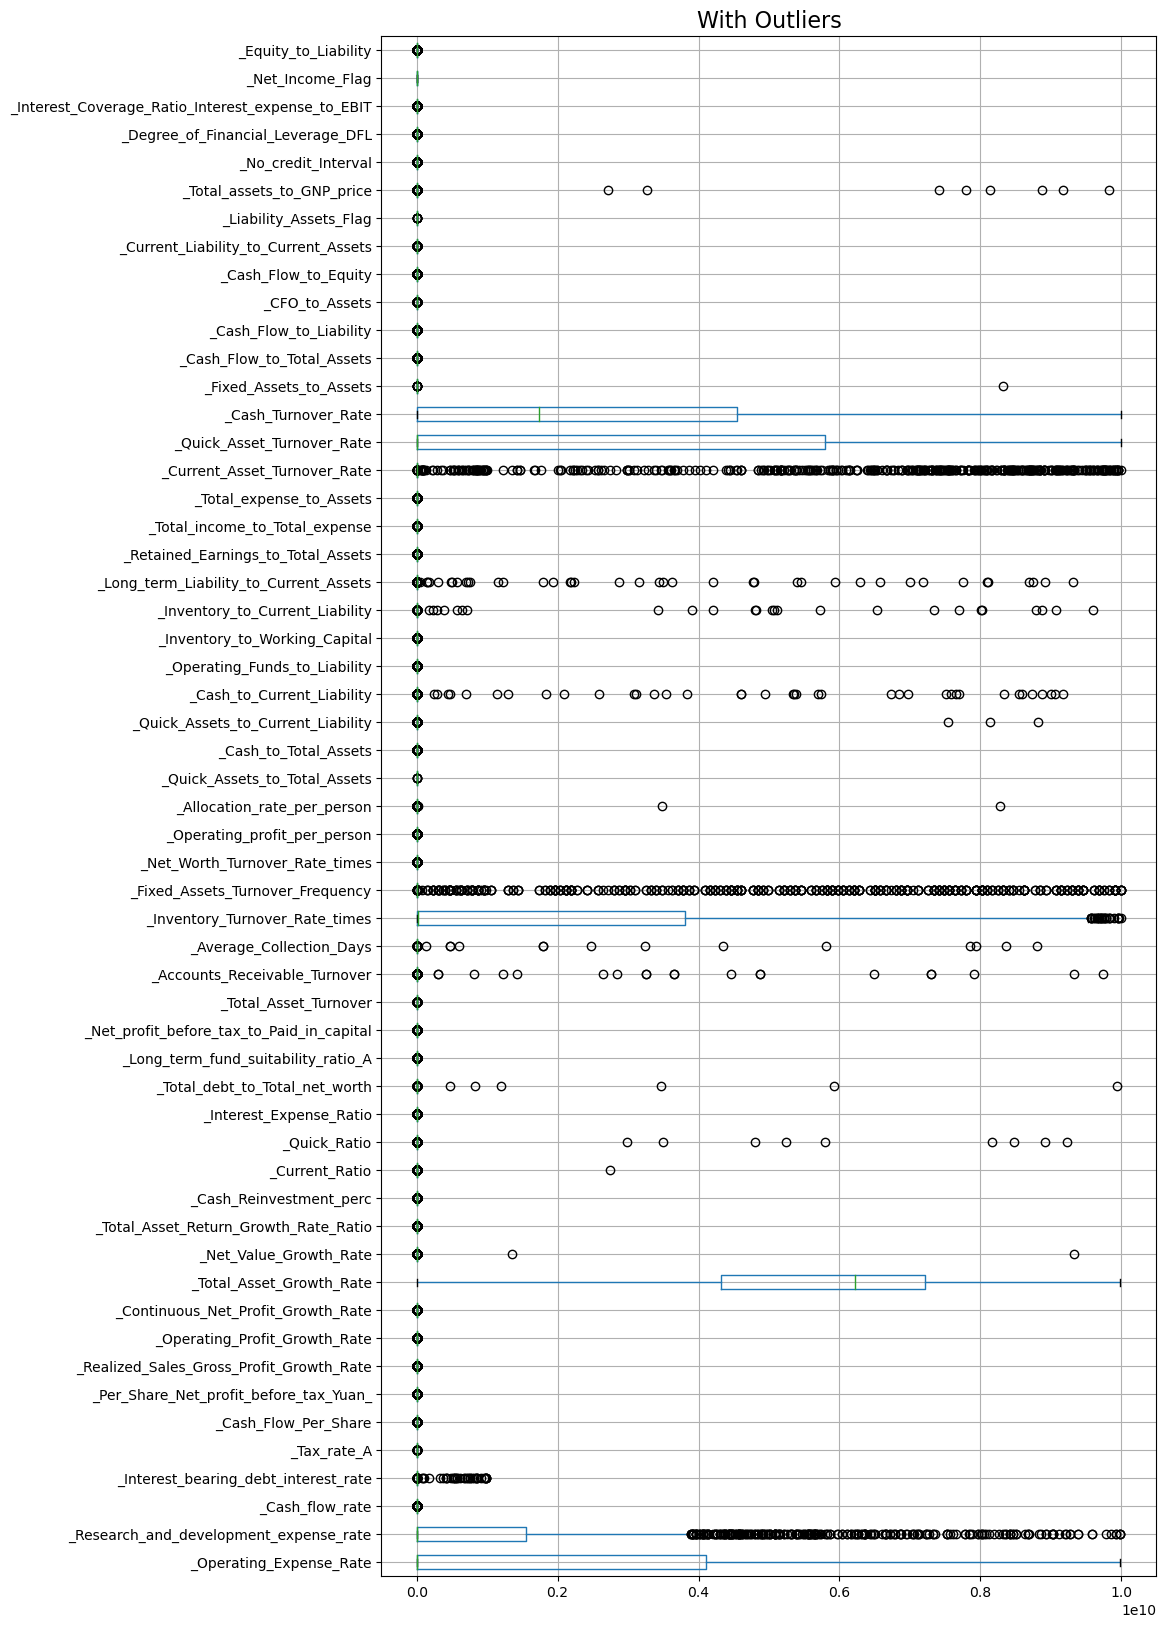

In [441]:
plt.figure(figsize=(10,20))
df_X.boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show();


In [442]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [443]:
for column in df_X.columns:
    lr,ur=remove_outlier(df_X[column])
    df_X[column]=np.where(df_X[column]>ur,ur,df_X[column])
    df_X[column]=np.where(df_X[column]<lr,lr,df_X[column])

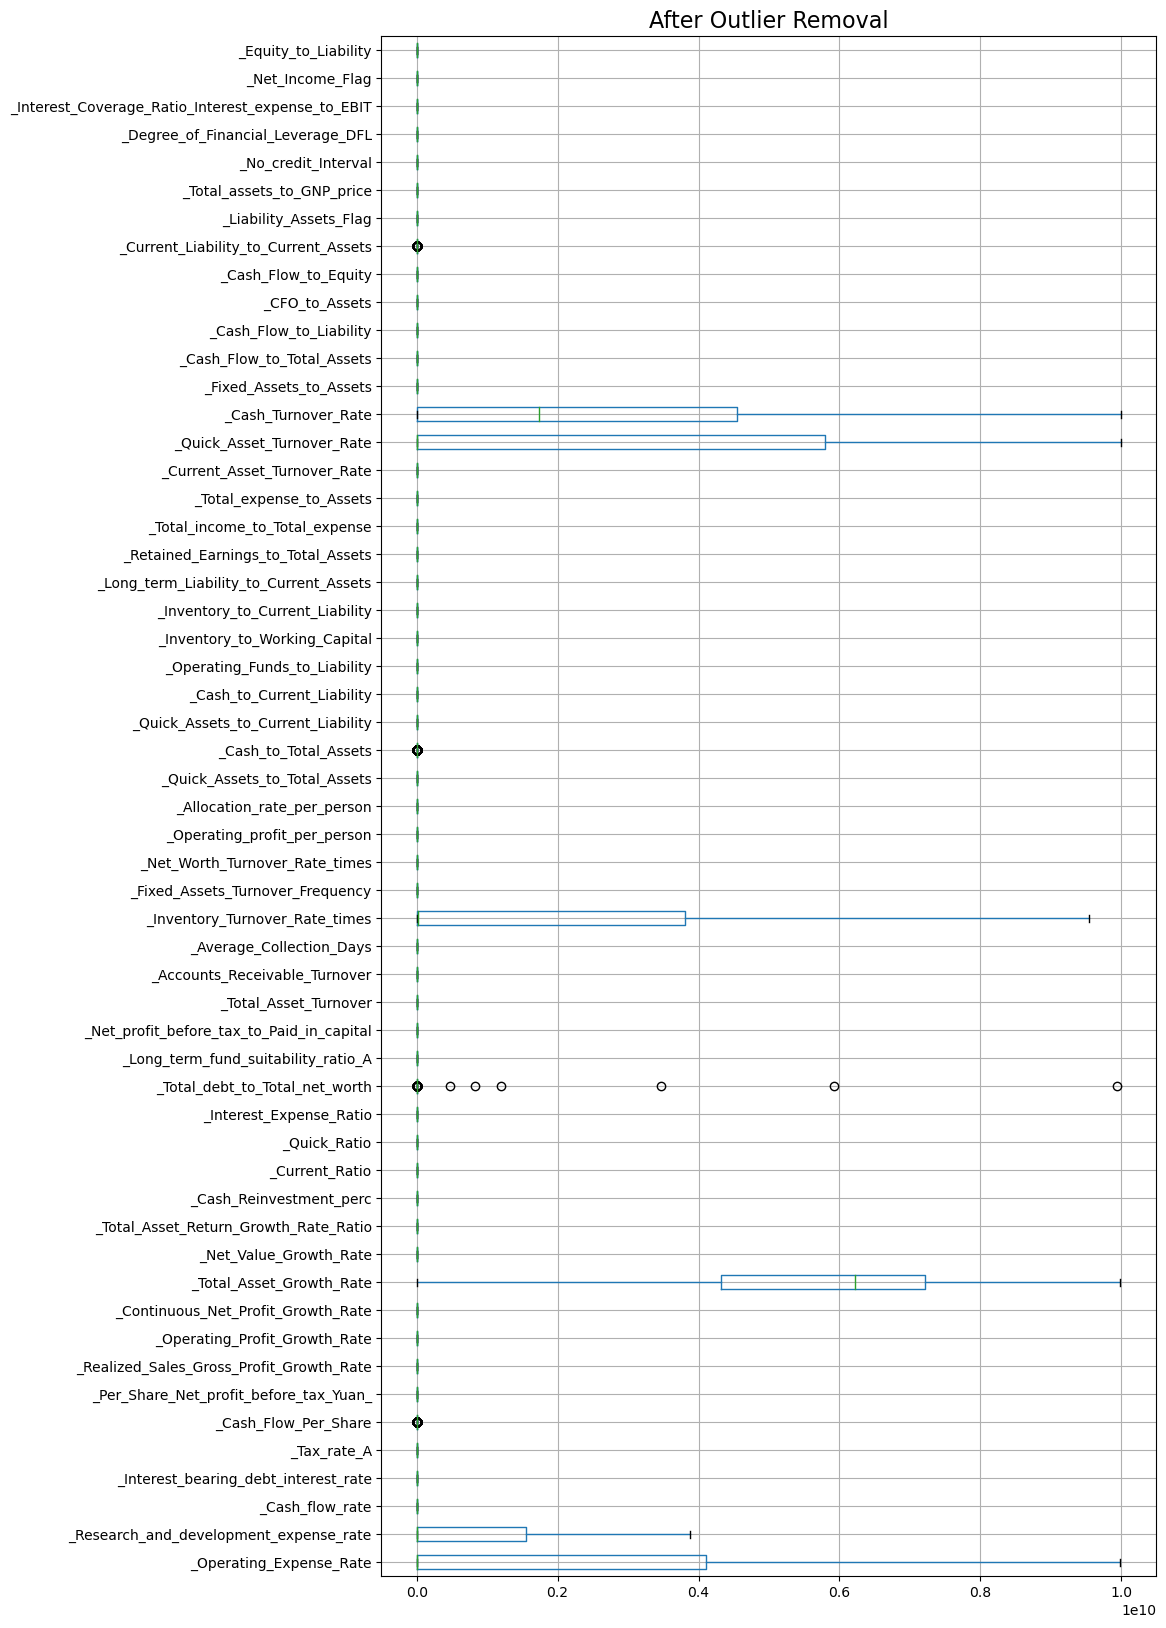

In [444]:
plt.figure(figsize=(10,20))
df_X.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show();

In [445]:
df_sub1 = pd.concat([df_X, df_Y], axis =1 )

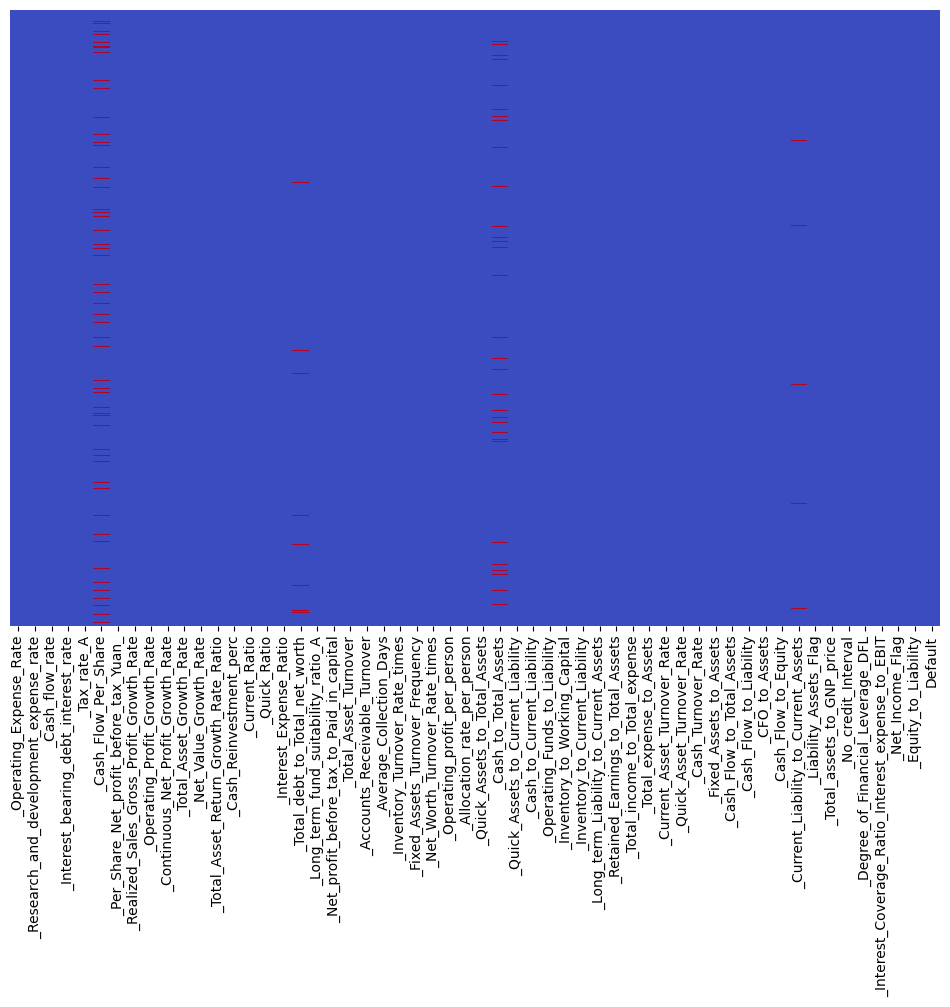

In [446]:
plt.figure(figsize = (12,8))
sns.heatmap(df_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [447]:
predictors = df_sub1.drop('Default', axis = 1)
response = df_sub1['Default']

In [448]:
from sklearn.preprocessing import StandardScaler #Scale train and test separately
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [449]:
df_sub3 = pd.concat([scaled_predictors, response], axis = 1)

In [450]:
df_sub3.columns

Index(['_Operating_Expense_Rate', '_Research_and_development_expense_rate',
       '_Cash_flow_rate', '_Interest_bearing_debt_interest_rate',
       '_Tax_rate_A', '_Cash_Flow_Per_Share',
       '_Per_Share_Net_profit_before_tax_Yuan_',
       '_Realized_Sales_Gross_Profit_Growth_Rate',
       '_Operating_Profit_Growth_Rate', '_Continuous_Net_Profit_Growth_Rate',
       '_Total_Asset_Growth_Rate', '_Net_Value_Growth_Rate',
       '_Total_Asset_Return_Growth_Rate_Ratio', '_Cash_Reinvestment_perc',
       '_Current_Ratio', '_Quick_Ratio', '_Interest_Expense_Ratio',
       '_Total_debt_to_Total_net_worth', '_Long_term_fund_suitability_ratio_A',
       '_Net_profit_before_tax_to_Paid_in_capital', '_Total_Asset_Turnover',
       '_Accounts_Receivable_Turnover', '_Average_Collection_Days',
       '_Inventory_Turnover_Rate_times', '_Fixed_Assets_Turnover_Frequency',
       '_Net_Worth_Turnover_Rate_times', '_Operating_profit_per_person',
       '_Allocation_rate_per_person', '_Quick_Assets_to

In [451]:
from sklearn.model_selection import train_test_split
Train, Test = train_test_split(df_sub3, test_size = 0.33, random_state=42, stratify = df_sub3.Default)

In [452]:
from sklearn.impute import KNNImputer #MICE FancyImpute

In [453]:
imputer = KNNImputer(n_neighbors=5)

In [454]:
df_imputed_train = pd.DataFrame(imputer.fit_transform(Train), columns = Train.columns)
df_imputed_test = pd.DataFrame(imputer.transform(Test), columns = Test.columns)

In [455]:
print(df_imputed_train.isnull().sum().sum())
print(df_imputed_test.isnull().sum().sum())

0
0


<Axes: >

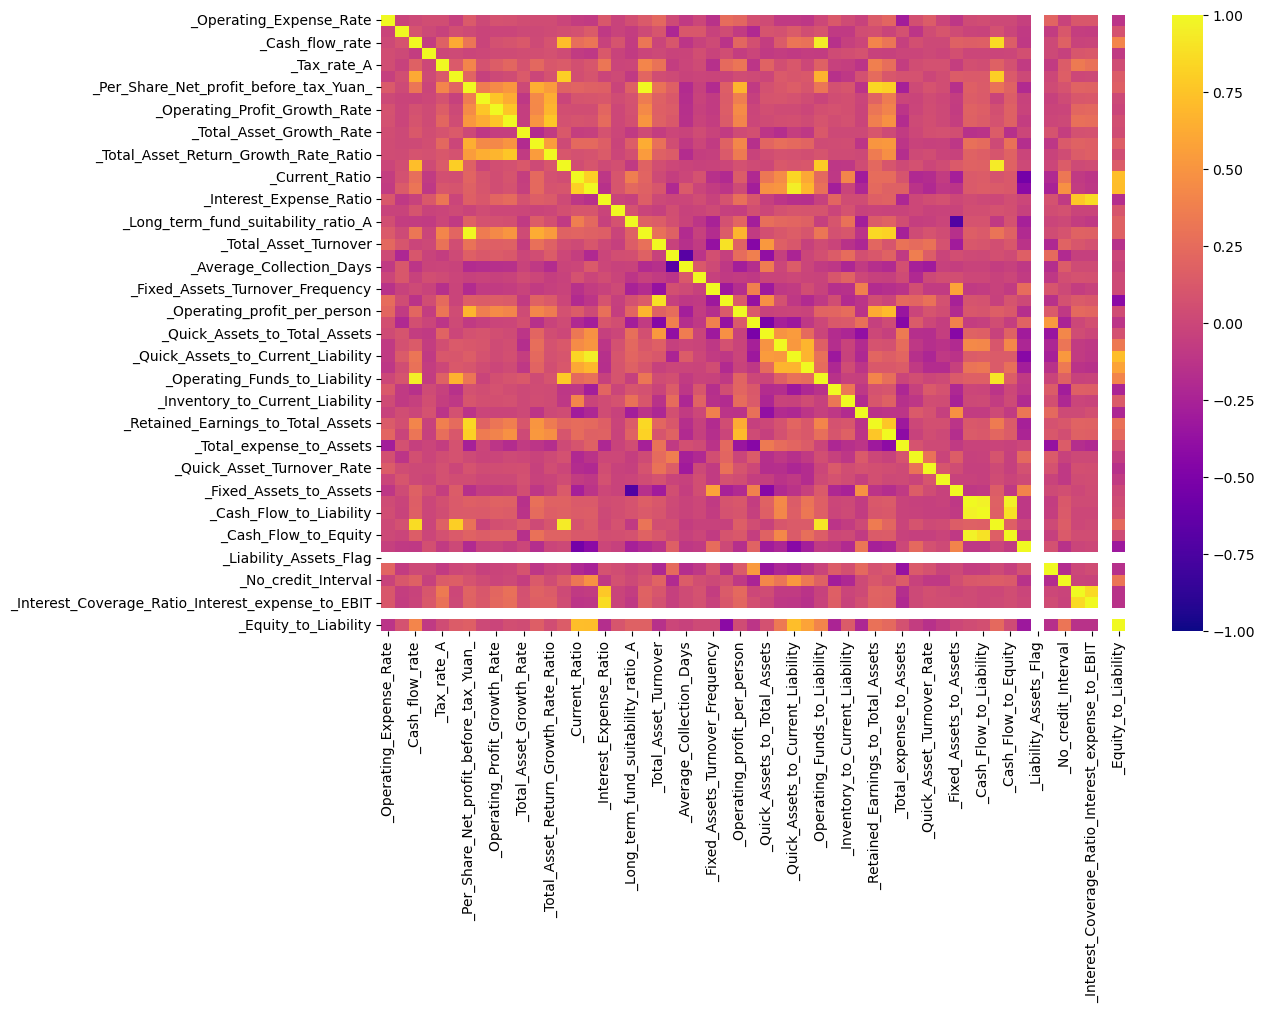

In [456]:
plt.figure(figsize = (12,8))
cor_matrix = df_imputed_train.drop('Default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

In [457]:
X_train = df_imputed_train.drop('Default', axis = 1)
y_train = df_imputed_train['Default']
X_test = df_imputed_test.drop('Default', axis = 1)
y_test = df_imputed_test['Default']

In [459]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

def remove_high_vif_features(X, threshold=5):
    while True:
        vif_data = calculate_vif(X)
        max_vif = vif_data['VIF'].max()
        if max_vif > threshold:
            remove_index = vif_data[vif_data['VIF'] == max_vif].index[0]
            print(f"Removing feature '{X.columns[remove_index]}' with VIF {max_vif}")
            X = X.drop(X.columns[remove_index], axis=1)
        else:
            break
    return X

# Calculate VIF and remove features iteratively
X_train_final = remove_high_vif_features(X_train)
print("\nFinal VIF values after feature selection:\n")
print(calculate_vif(X_train_final).sort_values(by='VIF', ascending=False))


Removing feature '_Net_profit_before_tax_to_Paid_in_capital' with VIF 82.17928944305494
Removing feature '_Cash_Flow_to_Total_Assets' with VIF 67.02030026534452
Removing feature '_CFO_to_Assets' with VIF 31.69539594322159
Removing feature '_Quick_Assets_to_Current_Liability' with VIF 23.66694047654837
Removing feature '_Operating_Funds_to_Liability' with VIF 18.78855697139745
Removing feature '_Total_Asset_Turnover' with VIF 11.005459436694744
Removing feature '_Current_Ratio' with VIF 8.597775329358313
Removing feature '_Per_Share_Net_profit_before_tax_Yuan_' with VIF 7.682550870669504
Removing feature '_Interest_Coverage_Ratio_Interest_expense_to_EBIT' with VIF 6.3525411973458805
Removing feature '_Quick_Assets_to_Total_Assets' with VIF 5.546328769561229
Removing feature '_Cash_Flow_to_Equity' with VIF 5.431662578890191
Final VIF values after feature selection:
                                     Feature  VIF
35                   _Fixed_Assets_to_Assets 4.76
12                   _Ca

In [460]:
X_train_final=X_train_final.drop(['_Liability_Assets_Flag','_Net_Income_Flag'],axis=1)

In [461]:
print(X_test_final.columns)


Index(['_Operating_Expense_Rate', '_Research_and_development_expense_rate',
       '_Cash_flow_rate', '_Interest_bearing_debt_interest_rate',
       '_Tax_rate_A', '_Cash_Flow_Per_Share',
       '_Realized_Sales_Gross_Profit_Growth_Rate',
       '_Operating_Profit_Growth_Rate', '_Continuous_Net_Profit_Growth_Rate',
       '_Total_Asset_Growth_Rate', '_Net_Value_Growth_Rate',
       '_Total_Asset_Return_Growth_Rate_Ratio', '_Cash_Reinvestment_perc',
       '_Quick_Ratio', '_Interest_Expense_Ratio',
       '_Total_debt_to_Total_net_worth', '_Long_term_fund_suitability_ratio_A',
       '_Accounts_Receivable_Turnover', '_Average_Collection_Days',
       '_Inventory_Turnover_Rate_times', '_Fixed_Assets_Turnover_Frequency',
       '_Net_Worth_Turnover_Rate_times', '_Operating_profit_per_person',
       '_Allocation_rate_per_person', '_Cash_to_Total_Assets',
       '_Cash_to_Current_Liability', '_Inventory_to_Working_Capital',
       '_Inventory_to_Current_Liability',
       '_Long_term_Liabi

In [464]:
X_test_final=X_test_final.drop(['_Liability_Assets_Flag','_Net_Income_Flag'],axis=1)

In [465]:
X_train_final.shape

(1378, 42)

In [466]:
X_test_final.shape

(680, 42)

#### Logistic Regression Model

In [470]:
import statsmodels.formula.api as SM

In [471]:
X_train_final = sm.add_constant(X_train_final)

In [472]:
logit_model = sm.Logit(y_train, X_train_final)
logit_result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.183224
         Iterations 9


In [473]:
logit_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1335
Method:                           MLE   Df Model:                           42
Date:                Tue, 02 Apr 2024   Pseudo R-squ.:                  0.4603
Time:                        20:18:02   Log-Likelihood:                -252.48
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 6.155e-66
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.3250      0.298    -14.517      0.000      -4.909      -3.741
_Operating_Expense_Rate                      0.1300      0.142      0.915      0.360      -0.149       0.409
_Research_and_development_expense_rate       0.4642      0.121      3.830      0.000       0.227       0.702
_Cash_flow_rate                              0.2370      0.312      0.759      0.448      -0.375       0.849
_Interest_bearing_debt_interest_rate         0.4053      0.150      2.695      0.007       0.111       0.700
_Tax_rate_A                                 -0.2224      0.175     -1.272      0.203      -0.565       0.120
_Cash_Flow_Per_Share                        -0.0772      0.284     -0.271      0.786      -0.635       0.480
_Realized_Sales_Gross_Profit_Growth_Rate    -0.0041      0.160     -0.026      0.980      -0.317       0.309
_Operating_Profit_Growth_Rate                0.0507      0.190      0.268      0.789      -0.321       0.422
_Continuous_Net_Profit_Growth_Rate          -0.4466      0.207     -2.160      0.031      -0.852      -0.041
_Total_Asset_Growth_Rate                    -0.1008      0.140     -0.719      0.472      -0.375       0.174
_Net_Value_Growth_Rate                      -0.1717      0.178     -0.966      0.334      -0.520       0.177
_Total_Asset_Return_Growth_Rate_Ratio        0.3022      0.197      1.536      0.124      -0.083       0.688
_Cash_Reinvestment_perc                     -0.2395      0.258     -0.930      0.352      -0.744       0.265
_Quick_Ratio                                -1.3348      0.352     -3.794      0.000      -2.024      -0.645
_Interest_Expense_Ratio                      0.0290      0.157      0.186      0.853      -0.278       0.336
_Total_debt_to_Total_net_worth               0.2445      0.068      3.582      0.000       0.111       0.378
_Long_term_fund_suitability_ratio_A          0.1995      0.201      0.990      0.322      -0.195       0.594
_Accounts_Receivable_Turnover               -0.6611      0.223     -2.960      0.003      -1.099      -0.223
_Average_Collection_Days                     0.1809      0.188      0.961      0.337      -0.188       0.550
_Inventory_Turnover_Rate_times              -0.0422      0.132     -0.320      0.749      -0.301       0.217
_Fixed_Assets_Turnover_Frequency             0.0716      0.163      0.439      0.661      -0.248       0.391
_Net_Worth_Turnover_Rate_times              -0.0335      0.197     -0.170      0.865      -0.420       0.353
_Operating_profit_per_person                 0.3203      0.218      1.469      0.142      -0.107       0.748
_Allocation_rate_per_person                  0.4776      0.208      2.299      0.021       0.070       0.885
_Cash_to_Total_Assets                        0.0484      0.268      0.181      0.857      -0.477       0.574
_Cash_to_Current_Liability                   0.3457      0.186      1.856      0

In [474]:
X_test_final = sm.add_constant(X_test_final)

#### Predicting on Training and Test dataset

In [492]:
pred_train = logit_result.predict(X_train_final)
pred_train

0      0.18
1      0.00
2      0.17
3      0.09
4      0.14
       ... 
1373   0.00
1374   0.02
1375   0.10
1376   0.00
1377   0.06
Length: 1378, dtype: float64

In [494]:
pred_test = logit_result.predict(X_test_final)
pred_test

0     0.00
1     0.02
2     0.00
3     0.00
4     0.00
      ... 
675   0.07
676   0.15
677   0.00
678   0.01
679   0.15
Length: 680, dtype: float64

In [ ]:
threshold = 0.5  # You can change the threshold if needed
y_pred = (pred_test > threshold).astype(int)

In [498]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[586  21]
 [ 36  37]]


In [497]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       607
         1.0       0.64      0.51      0.56        73

    accuracy                           0.92       680
   macro avg       0.79      0.74      0.76       680
weighted avg       0.91      0.92      0.91       680



#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train_final, y_train)

In [ ]:
#### Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train_final)
model_score =RF_model.score(X_train_final, y_train)
print("Model Score:",model_score)
print("\nConfusion Matrix:\n\n",metrics.confusion_matrix(y_train, y_train_predict))
print("\nClassification Report:\n\n",metrics.classification_report(y_train, y_train_predict))

In [ ]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test_final)
model_score = RF_model.score(X_test_final, y_test)
print("Model Score:",model_score)
print("\nConfusion Matrix:\n\n",metrics.confusion_matrix(y_test, y_test_predict))
print("\nClassification Report:\n\n",metrics.classification_report(y_test, y_test_predict))

#### Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score
#RF_model = RandomForestClassifier(n_estimators=100, random_state=1)
train_score = cross_val_score(RF_model, X_train_final, y_train, cv=10)
print("Accuracy of trained dataset:",np.mean(train_score))

test_score = cross_val_score(RF_model, X_test_final, y_test, cv=10)
print("Accuracy of test dataset:",np.mean(test_score))

print('\n',"Classification report for train dataset:",'\n',classification_report(y_train, ytrain_predict),'\n');
print("Classification report for test dataset:",'\n',classification_report(y_test, ytest_predict),'\n');

#### LDA Model

In [323]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [324]:
#Build LDA Model
# Refer details for LDA at http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train_final, y_train)
model

LinearDiscriminantAnalysis()

#### Prediction

In [325]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train_final)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test_final)

In [326]:
pred_class_train

array([0., 0., 0., ..., 0., 0., 0.])

In [327]:
pred_class_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

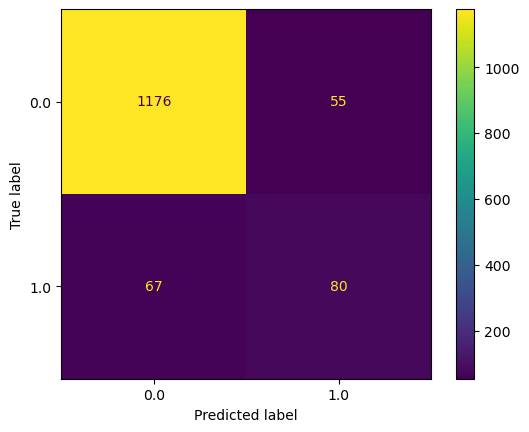

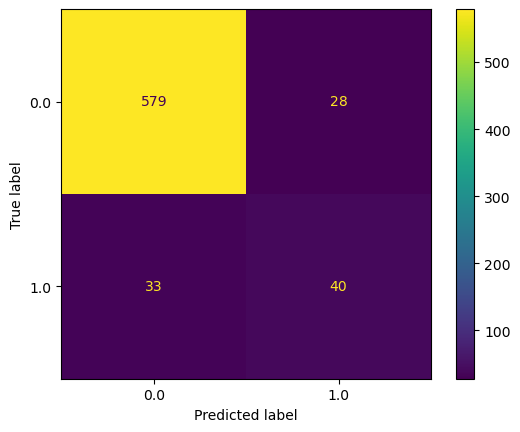

In [328]:
## Confusion matrix on the training data
cm = confusion_matrix(y_train, pred_class_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot();
## Confusion matrix on the test data
cm = confusion_matrix(y_test, pred_class_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot();

In [329]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      1231
         1.0       0.59      0.54      0.57       147

    accuracy                           0.91      1378
   macro avg       0.77      0.75      0.76      1378
weighted avg       0.91      0.91      0.91      1378
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       607
         1.0       0.59      0.55      0.57        73

    accuracy                           0.91       680
   macro avg       0.77      0.75      0.76       680
weighted avg       0.91      0.91      0.91       680
 



#### Probability prediction for the training and test data

In [330]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train_final)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test_final)

AUC for the Training Data: 0.916
AUC for the Test Data: 0.899


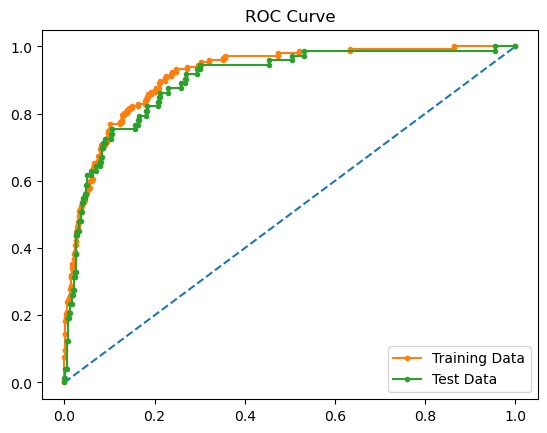

In [331]:
auc_train = metrics.roc_auc_score(y_train, pred_prob_train[:, 1])
print('AUC for the Training Data: %.3f' % auc_train)

# Calculate ROC curve
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, pred_prob_train[:, 1])

# Plot ROC curve for the training data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, marker='.', label='Training Data')

# AUC and ROC for the test data
# Calculate AUC
auc_test = metrics.roc_auc_score(y_test, pred_prob_test[:, 1])
print('AUC for the Test Data: %.3f' % auc_test)

# Calculate ROC curve
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, pred_prob_test[:, 1])

# Plot ROC curve for the test data
plt.plot(fpr_test, tpr_test, marker='.', label='Test Data')

# Show the plot
plt.legend(loc='best')
plt.title('ROC Curve')
plt.show();

In [332]:
pred_prob_train[:20]

array([[8.28254766e-01, 1.71745234e-01],
       [9.95636622e-01, 4.36337828e-03],
       [9.54263175e-01, 4.57368252e-02],
       [8.91580804e-01, 1.08419196e-01],
       [8.58387726e-01, 1.41612274e-01],
       [8.33571819e-01, 1.66428181e-01],
       [8.88506567e-01, 1.11493433e-01],
       [9.96751385e-01, 3.24861521e-03],
       [9.90386203e-01, 9.61379656e-03],
       [9.96096766e-01, 3.90323362e-03],
       [9.98126067e-01, 1.87393285e-03],
       [9.99658599e-01, 3.41400517e-04],
       [9.88116690e-01, 1.18833104e-02],
       [9.97370484e-01, 2.62951602e-03],
       [9.72435489e-01, 2.75645113e-02],
       [9.74938353e-01, 2.50616474e-02],
       [6.33383796e-01, 3.66616204e-01],
       [9.95430991e-01, 4.56900896e-03],
       [9.90512895e-01, 9.48710479e-03],
       [9.96668061e-01, 3.33193931e-03]])

In [333]:
pred_prob_test[:20]

array([[9.97149761e-01, 2.85023936e-03],
       [9.88184753e-01, 1.18152468e-02],
       [9.95223419e-01, 4.77658087e-03],
       [9.98873887e-01, 1.12611299e-03],
       [9.98298508e-01, 1.70149173e-03],
       [9.98850004e-01, 1.14999563e-03],
       [8.87554889e-01, 1.12445111e-01],
       [9.88678481e-01, 1.13215194e-02],
       [9.67542682e-01, 3.24573179e-02],
       [9.73791082e-01, 2.62089181e-02],
       [9.92303624e-01, 7.69637555e-03],
       [9.70468465e-01, 2.95315349e-02],
       [9.98502179e-01, 1.49782137e-03],
       [7.27567018e-01, 2.72432982e-01],
       [9.97364787e-01, 2.63521279e-03],
       [9.86904151e-01, 1.30958490e-02],
       [9.94735323e-01, 5.26467745e-03],
       [9.99090167e-01, 9.09833378e-04],
       [3.80155120e-01, 6.19844880e-01],
       [9.94745998e-01, 5.25400150e-03]])

#### Generate Coefficients and intercept for the Linear Discriminant Function

In [334]:
#intercept value
clf.intercept_ 

array([-3.8999759])

In [335]:
#coefficients for the Linear Discriminant Function
clf.coef_

array([[ 1.33094807e-01,  4.74549302e-01,  3.77921349e-01,
         3.00842869e-01, -1.54337945e-01, -6.48165501e-03,
        -2.87068439e-03,  3.21859237e-02, -3.01483752e-01,
        -1.76981711e-01, -6.38477956e-01,  2.03726574e-01,
        -3.65058831e-01, -8.49579842e-01, -1.19177669e-01,
         1.29540089e-01,  6.43888022e-03, -5.26103645e-01,
         1.40277823e-01,  8.05900226e-02,  1.67501012e-01,
         1.93738589e-01,  1.94755264e-01,  4.28944441e-01,
        -2.75104729e-01,  6.20182766e-01, -3.36274181e-01,
        -9.30502110e-02, -1.08142377e-01, -1.00396631e+00,
         4.88720383e-02,  6.42667681e-01, -8.87605568e-03,
        -7.38479359e-02, -2.54981496e-01, -7.72786708e-02,
        -7.22833871e-02,  1.98281251e-01, -1.51321561e-16,
         1.96921229e-01, -1.45063314e-01, -3.56467303e-01,
         0.00000000e+00, -4.64554346e-01]])

In [336]:
X_train_final.columns

Index(['_Operating_Expense_Rate', '_Research_and_development_expense_rate',
       '_Cash_flow_rate', '_Interest_bearing_debt_interest_rate',
       '_Tax_rate_A', '_Cash_Flow_Per_Share',
       '_Realized_Sales_Gross_Profit_Growth_Rate',
       '_Operating_Profit_Growth_Rate', '_Continuous_Net_Profit_Growth_Rate',
       '_Total_Asset_Growth_Rate', '_Net_Value_Growth_Rate',
       '_Total_Asset_Return_Growth_Rate_Ratio', '_Cash_Reinvestment_perc',
       '_Quick_Ratio', '_Interest_Expense_Ratio',
       '_Total_debt_to_Total_net_worth', '_Long_term_fund_suitability_ratio_A',
       '_Accounts_Receivable_Turnover', '_Average_Collection_Days',
       '_Inventory_Turnover_Rate_times', '_Fixed_Assets_Turnover_Frequency',
       '_Net_Worth_Turnover_Rate_times', '_Operating_profit_per_person',
       '_Allocation_rate_per_person', '_Cash_to_Total_Assets',
       '_Cash_to_Current_Liability', '_Inventory_to_Working_Capital',
       '_Inventory_to_Current_Liability',
       '_Long_term_Liabi

In [337]:
a=clf.coef_
np.round(a,2) # rounded up coefficients 

array([[ 0.13,  0.47,  0.38,  0.3 , -0.15, -0.01, -0.  ,  0.03, -0.3 ,
        -0.18, -0.64,  0.2 , -0.37, -0.85, -0.12,  0.13,  0.01, -0.53,
         0.14,  0.08,  0.17,  0.19,  0.19,  0.43, -0.28,  0.62, -0.34,
        -0.09, -0.11, -1.  ,  0.05,  0.64, -0.01, -0.07, -0.25, -0.08,
        -0.07,  0.2 , -0.  ,  0.2 , -0.15, -0.36,  0.  , -0.46]])

In [338]:
'''
LDF = (-3.8999759) + X1*0.13 + X2*0.47 + X3*0.38 + X4*0.30 + X5*(-0.15) + X6*(-0.01) + X7*(-0.00) + X8*0.03 + X9*(-0.30) + X10*(-0.18) + X11*(-0.64) + X12*0.20 + X13*(-0.37) + X14*(-0.85) + X15*(-0.12) + X16*0.13 + X17*0.01 + X18*(-0.53) + X19*0.14 + X20*0.08 + X21*0.17 + X22*0.19 + X23*0.19 + X24*0.43 + X25*(-0.28) + X26*0.62 + X27*(-0.34) + X28*(-0.09) + X29*(-0.11) + X30*(-1.00) + X31*0.05 + X32*0.64 + X33*(-0.01) + X34*(-0.07) + X35*(-0.25) + X36*(-0.08) + X37*(-0.07) + X38*0.20 + X39*(-0.00) + X40*0.20 + X41*(-0.15) + X42*(-0.36) + X43*0.00 + X44*(-0.46)
 
'''

'\nLDF = (-3.8999759) + X1*0.13 + X2*0.47 + X3*0.38 + X4*0.30 + X5*(-0.15) + X6*(-0.01) + X7*(-0.00) + X8*0.03 + X9*(-0.30) + X10*(-0.18) + X11*(-0.64) + X12*0.20 + X13*(-0.37) + X14*(-0.85) + X15*(-0.12) + X16*0.13 + X17*0.01 + X18*(-0.53) + X19*0.14 + X20*0.08 + X21*0.17 + X22*0.19 + X23*0.19 + X24*0.43 + X25*(-0.28) + X26*0.62 + X27*(-0.34) + X28*(-0.09) + X29*(-0.11) + X30*(-1.00) + X31*0.05 + X32*0.64 + X33*(-0.01) + X34*(-0.07) + X35*(-0.25) + X36*(-0.08) + X37*(-0.07) + X38*0.20 + X39*(-0.00) + X40*0.20 + X41*(-0.15) + X42*(-0.36) + X43*0.00 + X44*(-0.46)\n \n'

In [ ]:
lda= LinearDiscriminantAnalysis()
lor= LogisticRegression()


models=[lda,lor]

accuracy_train=[]
accuracy_test=[]


for i in models:  # Computation of RMSE and R2 values 
    i.fit(X_train,y_train)
    accuracy_train.append(accuracy_score(y_train,i.predict(X_train)))
    accuracy_test.append(accuracy_score(y_test,i.predict(X_test)))
    # predict probabilities
    

print(pd.DataFrame({'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['LDA','Logistic Regression']))